#   Python ML Regression Cheat Sheet


This document has been prepared by the amazing work and support of the Accenture Team and the Etisalat AI Generation Team

    The documented was created with as little use of hard-coding as possible so that you can take any part of the code and apply it on your own projects. Kindly improve on any points where hardcoding is used.

    Kindly expand on any unclear points and add any improvements you have!

     ( Add your Names :) )
     Kris, Anna-Marie, Abdulrahman, Aisha, Hend, Alyazia, Hessa, Abdulaziz 

# General Data Science Cycle:

Data Understanding
    0. Exploratory Data Analysis

Data Preparation
    1. Target Definition
    2. Feature Engineering
    3. Data Splitting

Modeling
    4. Variable Selection
    5. Model Selection
    6. Fine-tuning

Evaluation
    7. Evaluation & Interpretation

# Table of content (ML Classification on Telecom Churn Prediciton Dataset):

Libraries
    1. Basic Libraries to import 
    2. Import the libraries you need
 
Styling 
    1. Styling for graphs 
     
Data Import
    1. Importing default dataset (if taken from library)
    2. Turning to pandas dataframe (if not structured as dataframe)
    
EDA (Exploratory Data Analysis)
    1. Tabular Visualization 
        a. Top 5 Rows
        b. Bottom 5 rows 
        c. Looking at dataset metrics such as row count, mean, Median(50%), etc
    2. Graphical Visualization 
        a. Heat Map (Correlation Matrix)
        b. Find dist, mean, median
        c. Scatter Plot
        d. Pair Plot
    
Data Preparation
    1. Target Definition 
    2. Feature Engineering
        a. Feature Selection
        b. Nomalization
        c. Data cleaning
        d. One-hot encoding (for categorical/nominal variables).
    3. Data Splitting

Modeling
    1. Variable Selection
        a. variable selection methods
        b. selected variables -  overwrite
    2. Model Selection
    3. Fine-tuning

Evaluation
    7. Evaluation & Interpretation

# Libraries

## 1- Basic Libraries to import (Good idea to always start with these)

In [1]:
# Data Manipulation & analysis
import pandas as pd
import numpy as np

# Visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 2- Import the libraries you need from this list

In [2]:
# Boston Data
from sklearn.datasets import load_boston

# Data Manipulation & analysis
import pandas as pd
import numpy as np
from scipy import stats

# Visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

# Modeling
from boruta import BorutaPy 
import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
import xgboost as xgb
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.inspection import plot_partial_dependence

# Other Set Up
from datetime import datetime
import os
import warnings
from pprint import pprint

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# Styling 

## Styling for graphs

In [3]:
# Set style for displaying data
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Set style for plotting
sns.set_style("whitegrid")

-----------------------------------------------------------------------------------------------------------------------

# Data Import

- We will use the Boston dataset to predict the house prices "PRICE"
- Since the house price is a continous value, This is a regression problem

## 1- Importing the default Boston dataset and printing description of columns

- If taken from pandas library online

In [4]:
boston = load_boston()
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## 2- Turning dataset to Pandas dataframe

- Since the above data is not in tabular format -> Convert it into tables

In [6]:
import pandas as pd

In [9]:
# Set panda dataframe
boston_data = pd.DataFrame(boston.data)

# Set column names
boston_data.columns = boston.feature_names

# Set target
boston_target=pd.DataFrame(boston.target)
boston_target.columns=['PRICE']

# Merge into 1 data frame
boston_df = pd.merge(boston_data,boston_target,left_index = True, right_index = True)

data = boston_df.copy()

# EDA (Exploratory Data Analysis) - Visualizing the data

## 1- Tabular Visualization

###   a. Top 5 rows

In [16]:
data.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### b. Bottom 5 rows

In [11]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [14]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'], dtype='object')

### c. Looking at dataset metrics such as row count, mean, Median(50%), etc

In [17]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
data_desc = data.describe()
data_desc.style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
mean,3.61352,11.3636,11.1368,0.06917,0.554695,6.28463,68.5749,3.79504,9.54941,408.237,18.4555,356.674,12.6531,22.5328
std,8.60155,23.3225,6.86035,0.253994,0.115878,0.702617,28.1489,2.10571,8.70726,168.537,2.16495,91.2949,7.14106,9.1971
min,0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5
25%,0.082045,0,5.19,0,0.449,5.8855,45.025,2.10018,4,279,17.4,375.377,6.95,17.025
50%,0.25651,0,9.69,0,0.538,6.2085,77.5,3.20745,5,330,19.05,391.44,11.36,21.2
75%,3.67708,12.5,18.1,0,0.624,6.6235,94.075,5.18843,24,666,20.2,396.225,16.955,25
max,88.9762,100,27.74,1,0.871,8.78,100,12.1265,24,711,22,396.9,37.97,50


### d- Checking Null Values in dataset 

In [22]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [27]:
data[data.isna() == True]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sampling Data Set (Decrease Population Size) [Optional]

- Sampling is not recommneded for this dataset as the number of rows is small

In [ ]:
#rows = data.sample(frac =.25)

In [13]:
#rows

## 2- Graphical Visualization

### a. Heatmap

- Try to look for variables with high absolute correlation

In [45]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


(14.5, -0.5)

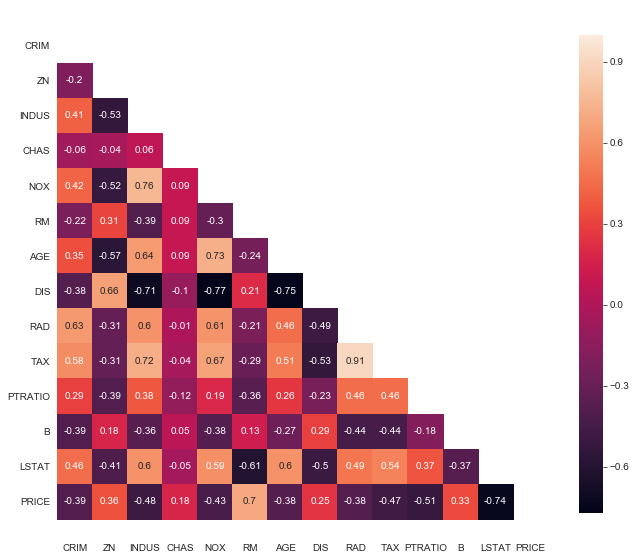

In [25]:
# Compute correlation matrix
corr = data.corr().round(2)

# Set figure options
fig,  ax = plt.subplots(figsize=(11,11),nrows=1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate heatmap including mask, and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True,annot=True, cbar_kws={"shrink": .8})

# Fix axis
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### b. Find dist, mean, median

### i- Set Targets

In [40]:
x = 'RM'
multiple_x = ['INDUS', 'RM', 'PTRATIO', 'LSTAT']
y = 'PRICE'

In [33]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'], dtype='object')

#### Setting feature with highest correlation with "Price" as x and our target "PRICE" as y

#### Note: Try to experiment with many different columns even if they do not have high correlation
    You can add columns to the multiple_x variable to try different things

### ii. Accross one variable (univariate)


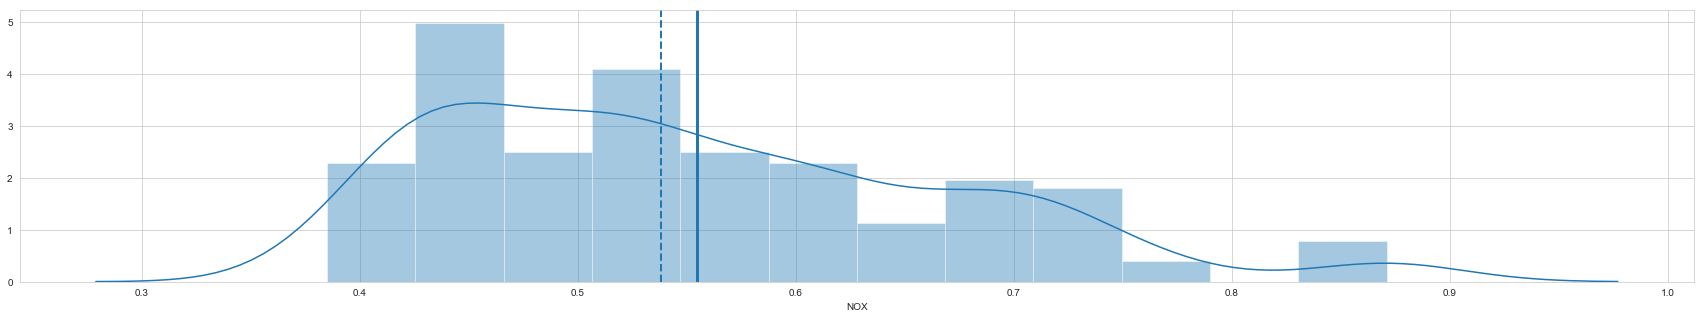

In [32]:
fig,  ax = plt.subplots(ncols=1,figsize=(30,5),nrows=1)

sns.distplot(data[x])
ax.axvline(data[x].mean(), linestyle='solid', linewidth=3)
ax.axvline(data[x].median(),  linestyle='dashed', linewidth=2)

### iii. Multi-variate Analysis (Accross multiple variables/features)

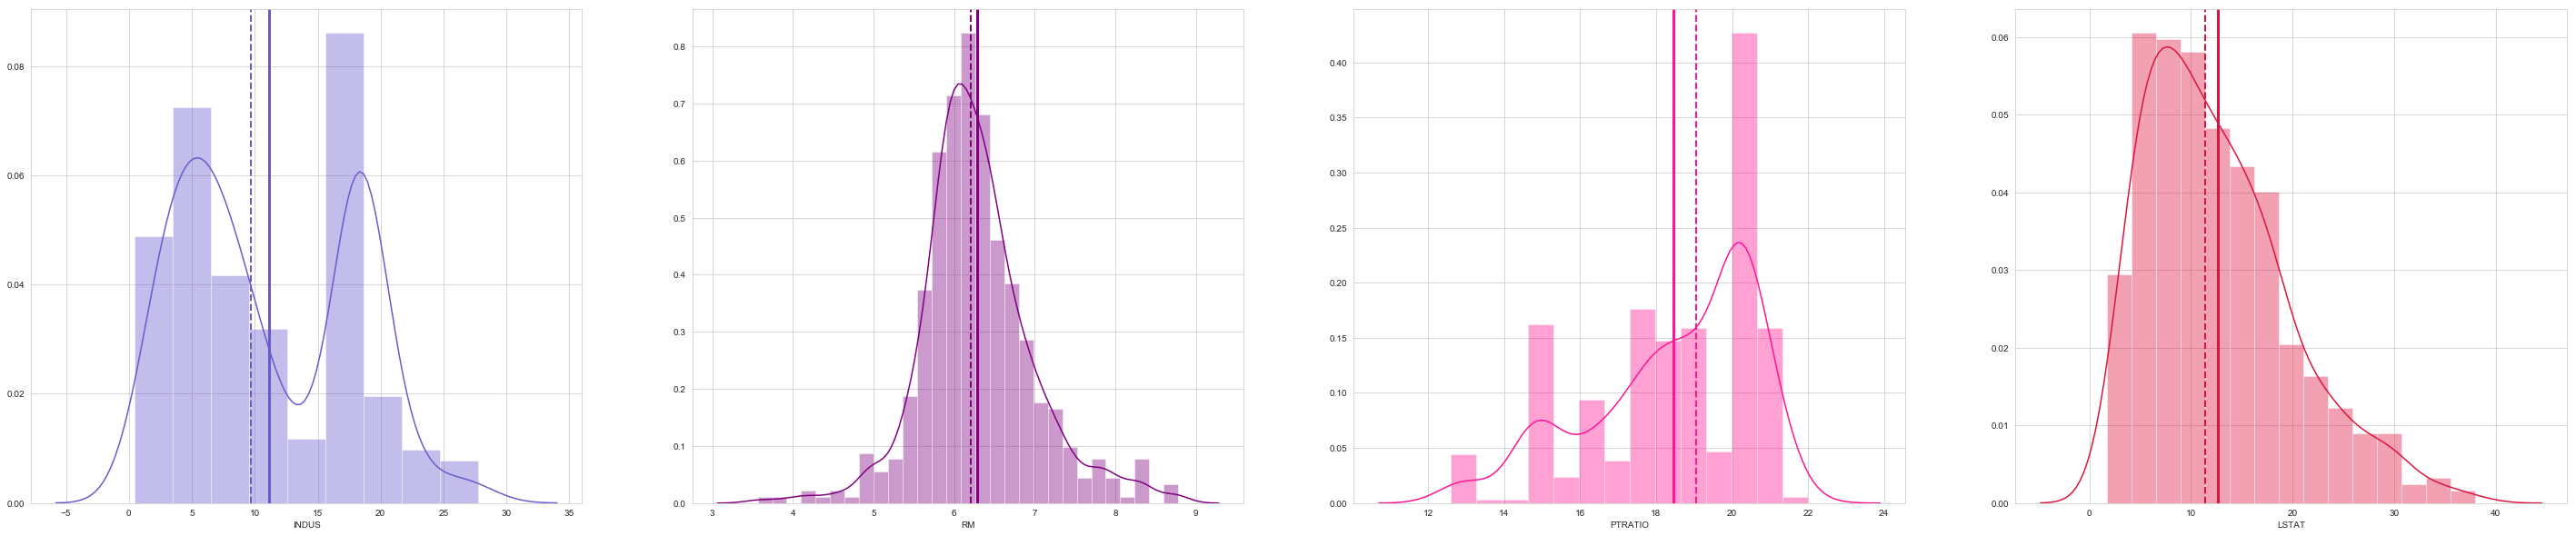

In [35]:
# Set colors
clr = ['slateblue', 'purple', 'deeppink','crimson'] 

## Create plots for multivariate distributions, means, medians

# Create  empty subplots
fig,  ax = plt.subplots(ncols=4,figsize=(50,10),nrows=1)

# Select features to check and loop through
for i, var in enumerate(multiple_x):
    sns.distplot(data[var],  color = clr[i], ax=ax[i])
    ax[i].axvline(data[var].mean(), color=clr[i], linestyle='solid', linewidth=3)
    ax[i].axvline(data[var].median(), color=clr[i], linestyle='dashed', linewidth=2)

### iv. Multi-variate Analysis (Accross all variables/features)

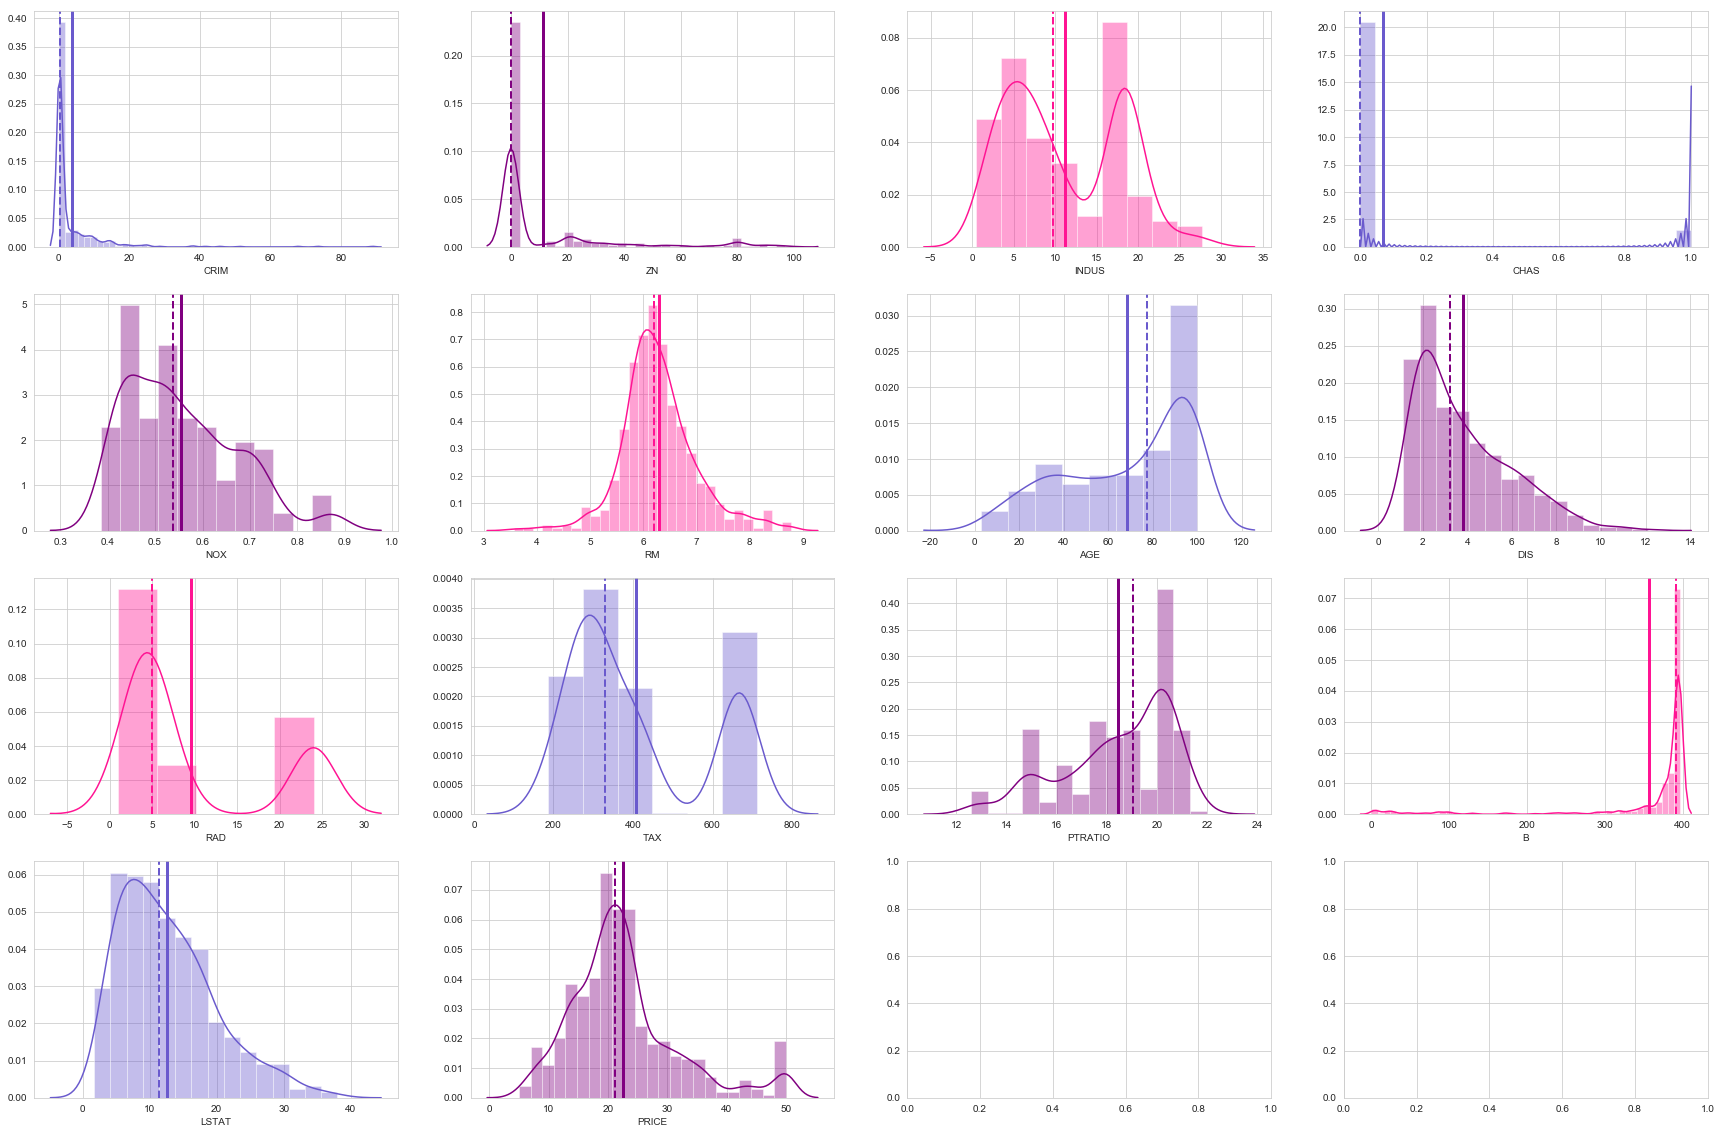

In [37]:
columns=list(data.columns.values)
# Set colors
clr = ['slateblue', 'purple', 'deeppink'] 
# Create  empty subplots
fig,  ax = plt.subplots(ncols=4,figsize=(30,20),nrows=4)
#ax = ax.T.flatten()
ax = ax.flatten()
# Select features to check and loop through
cnt=0
for i, var in enumerate(columns):
    sns.distplot(data[var],  color = clr[cnt], ax=ax[i])# the when graphing in subplots ax needs to be inside graph function
    ax[i].axvline(data[var].mean(), color=clr[cnt], linestyle='solid', linewidth=3)
    ax[i].axvline(data[var].median(), color=clr[cnt], linestyle='dashed', linewidth=2)
    cnt+=1
    if cnt%3==0:
        cnt=0  

### c- Scatter Plot

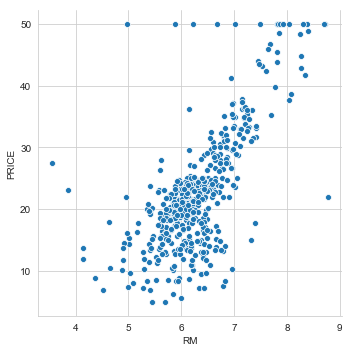

In [41]:
ax=sns.relplot(x=x, y=y,kind="scatter", data=data) #hue is for catagorical data 
#ax=sns.relplot(x='PRICE', y='RM', hue="churn",kind="scatter", data=data)

### d- Pairplot

#### i- Generate pairplots for selected features

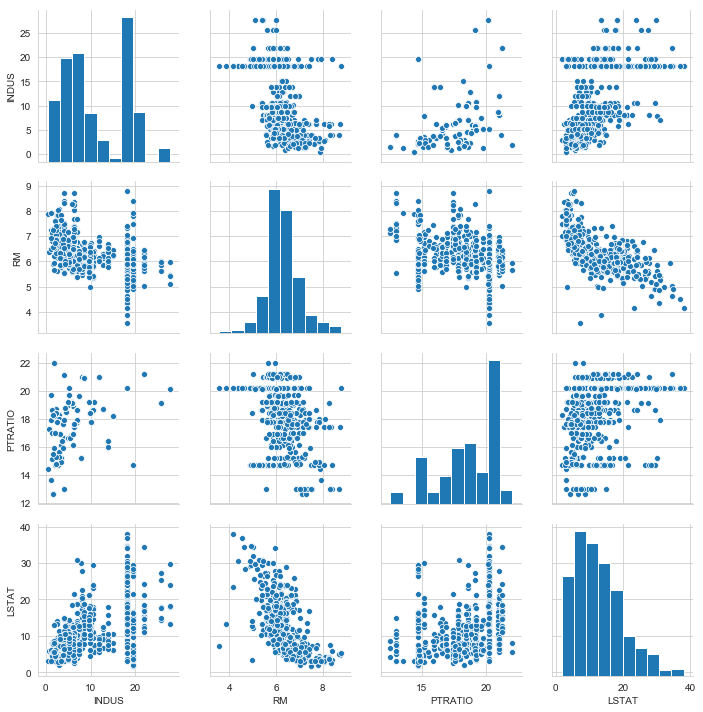

In [42]:
sns.pairplot(data[multiple_x])

#Notice the correlation between "PRICE" and "RM"(Number of rooms)

#### ii-Generate pairplots for all features

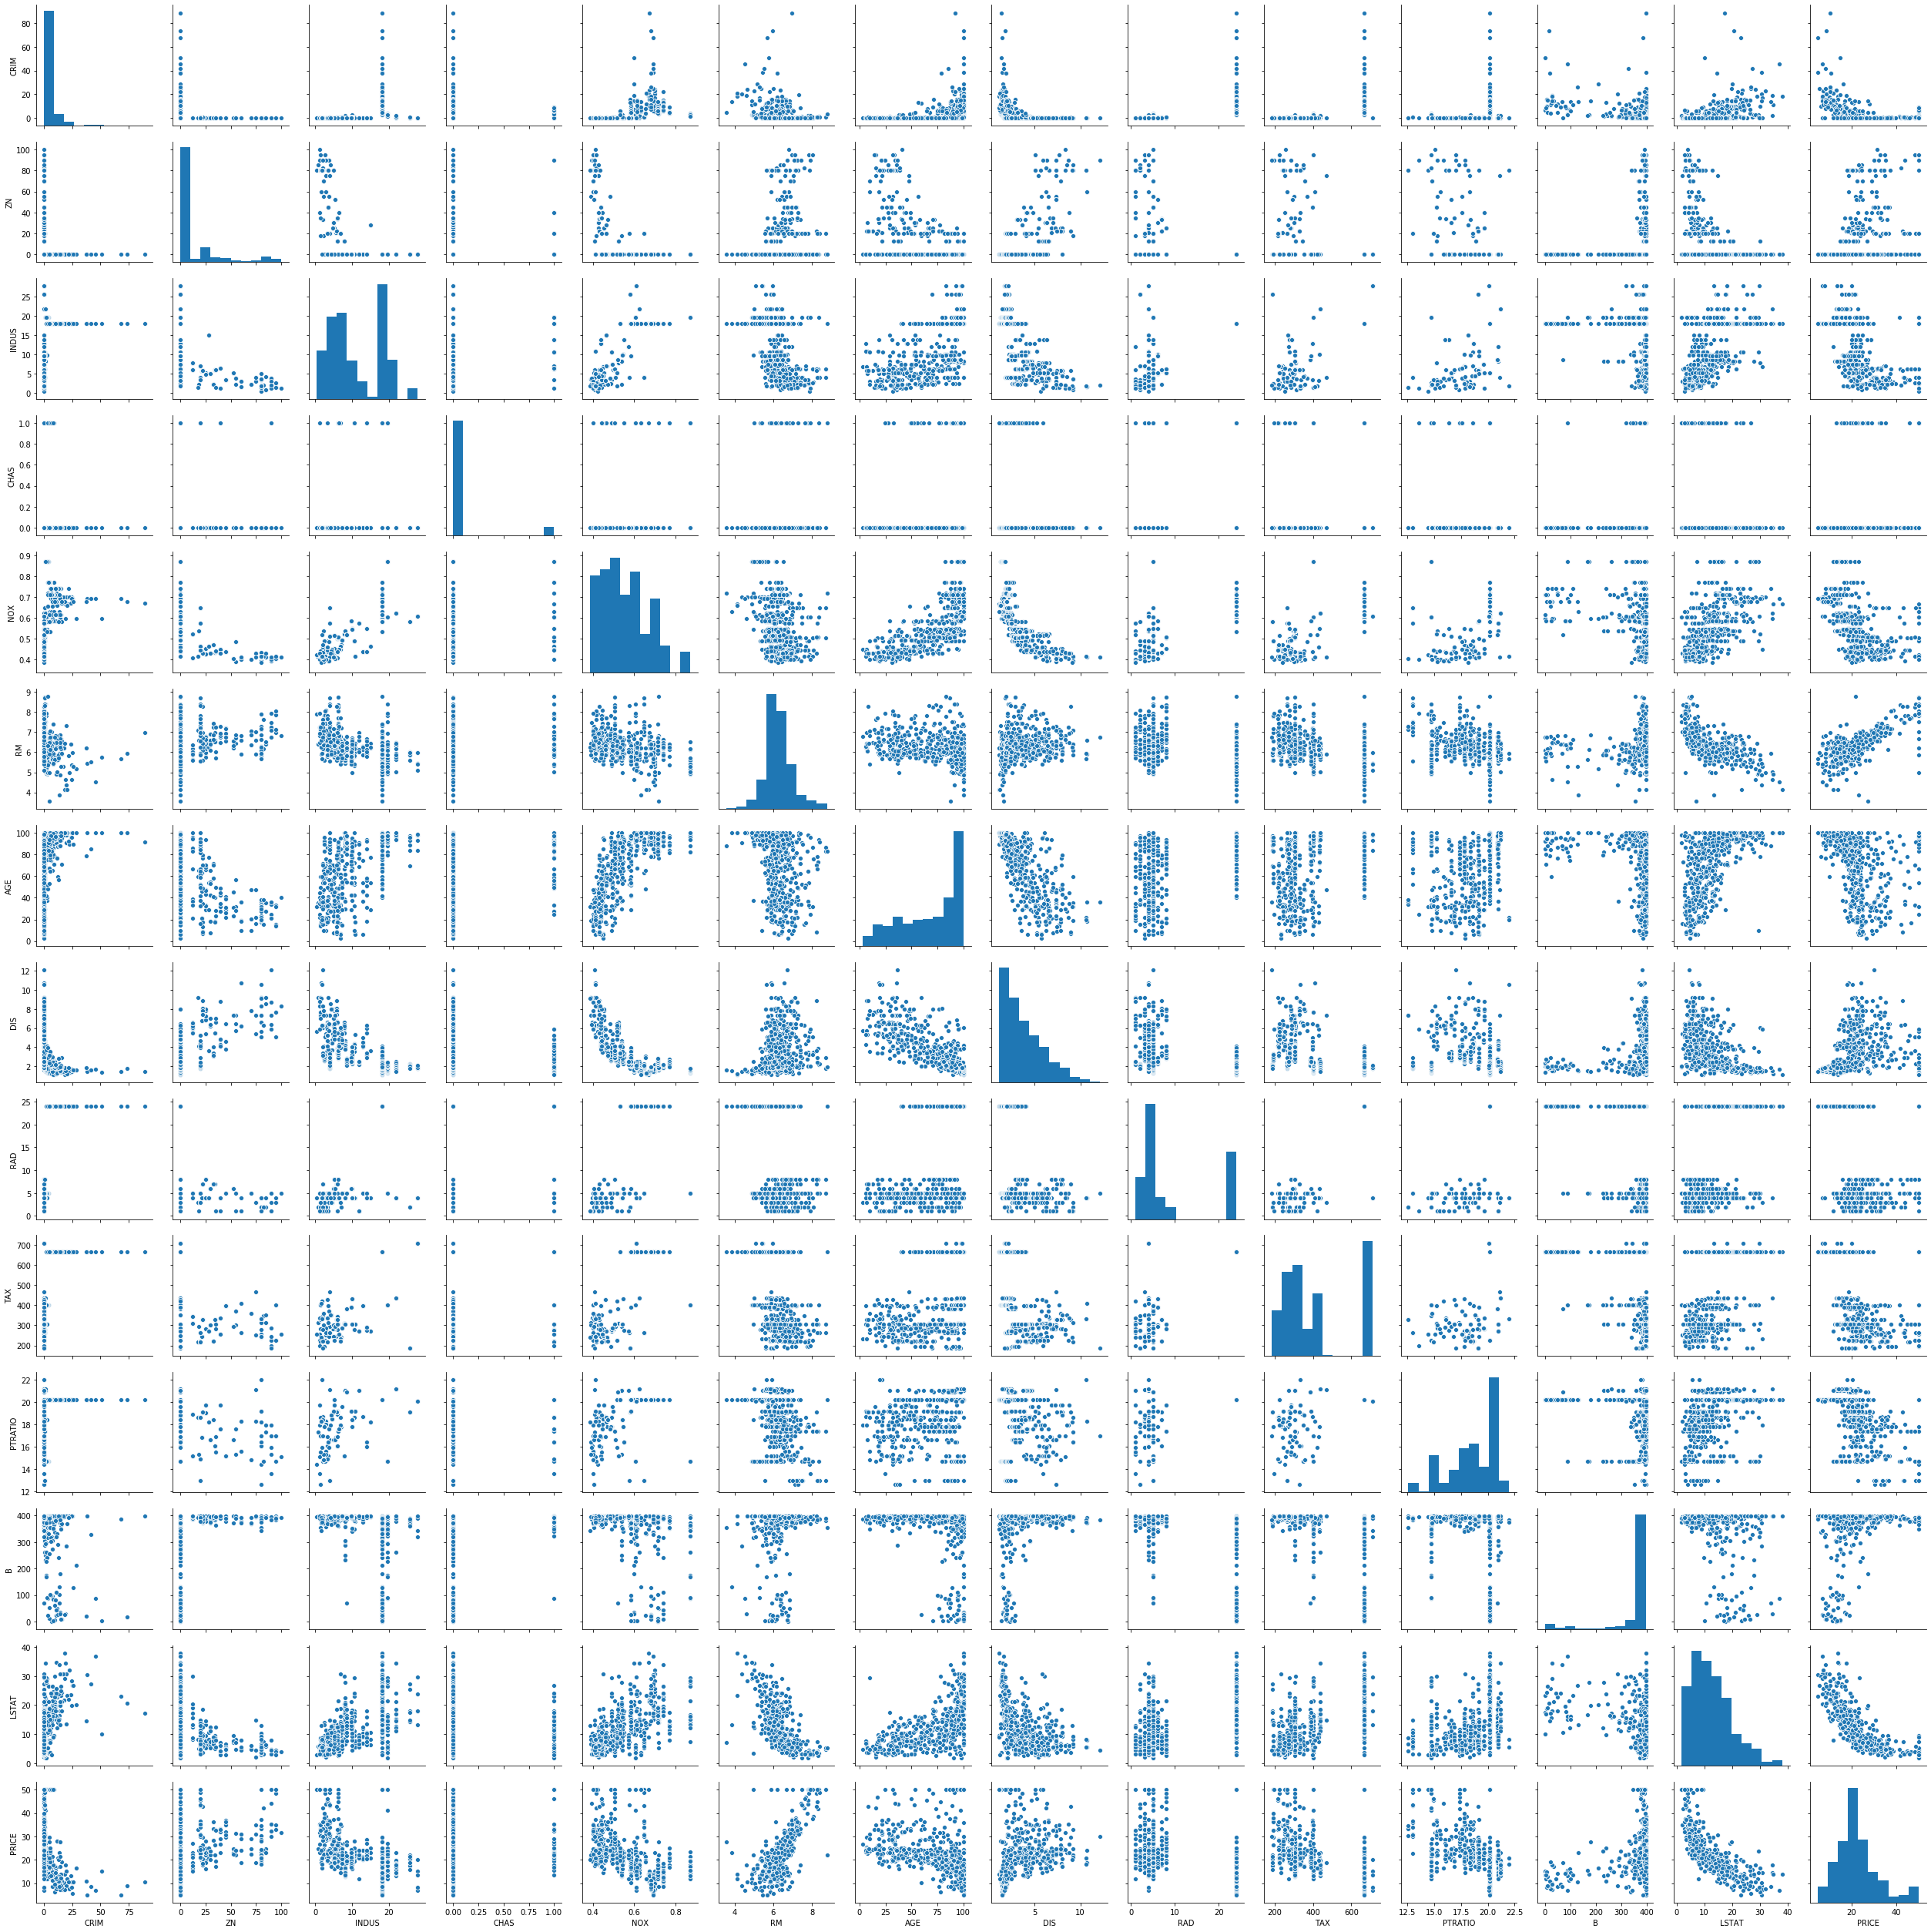

In [8]:
sns.pairplot(data)

-----------------------------------------------------------------------------------------------------------------------

# Data Preparation

Since this is an academic data set, Data Modeling step is not required and Feature Engineering step is minimal as the data has already been carefully designed and cleaned.

Let's split the data for testing purpose (Data Splitting step). We will set 10% of data aside. 

We can apply normalization to the range of 0 and 1 to make our data insensitive to the scale of features. (Feature Engineering step)

### Since we modified the "data" dataframe a lot for visualization, let's overwrite it with the original dataset again

In [71]:
data = boston_df.copy()

## 1- Target Definition

In [72]:
# Set target
target=['PRICE']
Y = data['PRICE']

## 2- Feature Engineering

### a- Feature Selection

- Selecting Target and Features
- Here we will select features based on the above analysis and domain expertise. More advanced feature selection can be done in the "Advanced" section

In [90]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'], dtype='object')

In [93]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

### c- Data Cleaning

- Data is already cleaned 

### d- One Hot Encoding 

- no categorical/nominal data

## 3- Split Data (Train/Test Split)

#### Here we will split the data to four parts (70:30):
    X_train: training columns 
    Y_train: target column
    X_test: ...
    y_test: ...

In [47]:
from sklearn.model_selection import train_test_split

In [94]:
# Create train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)
print(X_train.shape) #shows (number of rows, number of columns)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 13)
(76, 13)
(430,)
(76,)


- We can apply normalization to the range of 0 and 1 to make our data insensitive to the scale of features. (Feature Engineering step)
- There are other mothods for normalization such as: standardization, log scale...etc. 

### b- Normalization

- this step is part of the feature engineering but it is done after we split the data

In [58]:
from sklearn.preprocessing import MinMaxScaler 

In [95]:
# Scale from 0 to 1 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #

In [64]:
xdf = pd.DataFrame(X_train)

In [65]:
xdf.head()

,0,1,2,3,4
0,0.289630,0.277778,0.499329,0.117433,0.292494
1,0.071852,0.063992,0.822380,0.362684,0.057395
2,0.642963,0.588477,0.571757,0.035428,0.533940
3,1.000000,0.460905,0.355049,0.056907,0.613687
4,0.197407,0.049383,0.445296,0.488174,0.194812


#### Creating dataframe with column names

In [69]:
# This step is needed so that var selection methods can bring us column names - otherwise, 
# X_Train and Y_train are just numpy arrays, which is efficient for algorithm fitting but not for var selection 
X_train_df=pd.DataFrame(X_train)
#X_train_df.columns = boston.feature_names
X_test_df=pd.DataFrame(X_test)
#X_test_df.columns = boston.feature_names

----------------------------------------------------------------------------------------------------------------------

# Modeling

## 1- Variable Selection Methods

#### i. Variable Selection Method 1: Boruta Selection

In [36]:
rf = RandomForestRegressor(n_jobs=-1)

 #so Boruta runs, transform df to np arrayss
y2=np.ravel(Y_train) #for the warning to be sorted
y2
X2=np.array(X_train_df)
X2


#running boruta
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 30, perc = 90)
boruta_feature_selector.fit(X2, y2)

Iteration: 	1 / 30
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 30
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 30
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 30
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 30
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 30
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 30
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 30
Confirmed: 	5
Tentative: 	2
Rejected: 	3
Iteration: 	9 / 30
Confirmed: 	5
Tentative: 	2
Rejected: 	3
Iteration: 	10 / 30
Confirmed: 	5
Tentative: 	2
Rejected: 	3
Iteration: 	11 / 30
Confirmed: 	5
Tentative: 	2
Rejected: 	3
Iteration: 	12 / 30
Confirmed: 	5
Tentative: 	2
Rejected: 	3
Iteration: 	13 / 30
Confirmed: 	5
Tentative: 	2
Rejected: 	3
Iteration: 	14 / 30
Confirmed: 	5
Tentative: 	2
Rejected: 	3
Iteration: 	15 / 30
Confirmed: 	5
Tentative: 	2
Rejected: 	3
Iteration: 	16 / 30
Confirmed: 	5
Tentative: 	2
Rejected: 	3
Iteration: 	17 / 30
Confir

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                         max_depth=None, max_features='auto',
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=37, n_jobs=-1,
                                         oob_score=False,
                                         random_state=<mtrand.RandomState object at 0x0000021009589C78>,
                                         verbose=0, warm_start=False),
         max_iter=30, n_estimators='auto', perc=90,
         random_state=<mtrand.RandomState object at 0x0000021009589C78>,
         

In [37]:
# Show which features have been selected
features = [f for f in X_train_df.columns]
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
list(final_features)

['CRIM', 'NOX', 'RM', 'AGE', 'DIS']

#### ii. variable selection method 2: Stepwise Feature Selection

In [40]:
# Define the function which can be used with AIC
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.15, 
                       threshold_out = 0.2, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [41]:
result = stepwise_selection(X_train_df, Y_train) #need column names here, so not using train

print('resulting features:')
print(result)

Add  RM                             with p-value 4.27525e-53
Add  TAX                            with p-value 3.50418e-12
Add  CHAS                           with p-value 3.87353e-05
Add  AGE                            with p-value 0.00160493
Add  DIS                            with p-value 0.000234757
Add  CRIM                           with p-value 0.0015971
Add  ZN                             with p-value 0.00382252
Add  NOX                            with p-value 0.0137271
resulting features:
['RM', 'TAX', 'CHAS', 'AGE', 'DIS', 'CRIM', 'ZN', 'NOX']


C:\Users\hinda\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\hinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Stepwise Feature Selection tells us to keep:

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        
Which means, removing:
        - INDUS    proportion of non-retail business acres per town
        - AGE      proportion of owner-occupied units built prior to 1940


## 2- Selected Variables (OVERWRITE df in the selected column)

In [96]:
#we can overwrite original df-s with selected variables
X_train = X_train_df[['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT','ZN','CHAS','RAD']]
X_test = X_test_df[['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT','ZN','CHAS','RAD']]
#Y_train = Y_train_df
#Y_test = Y_test_df

KeyError: "None of [Index(['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'ZN', 'CHAS', 'RAD'], dtype='object')] are in the [columns]"

## 2 - Model Slecetion

### a- Linear Regression

- Since this is a regression problem, the best algorithm to start with is Linear Regression
- Here we will fit our features into a Linear Regression model

In [52]:
from sklearn.linear_model import LinearRegression #No need to import again if you already imported it above

In [105]:
# Set model: Simple Linear Regression
LinearRegression_model = LinearRegression().fit(X_train,Y_train) #We will fit the training data in the model

### a. Visualizing coefficients to understand which columns affect our model the most

In [56]:
LinearRegression_model.coef_

array([ -0.16001844, -10.43886213,   4.53605979,  -1.22182674,
        -0.67050483])

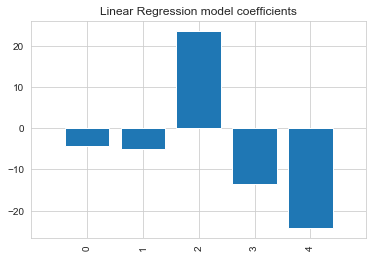

In [70]:
# Visualize Coefficients
sns.set_style("whitegrid")
plt.bar(np.arange(LinearRegression_model.coef_.shape[0]), LinearRegression_model.coef_)
plt.xticks(np.arange(LinearRegression_model.coef_.shape[0]), X_train_df.columns, rotation='vertical')
plt.xlim([-1, LinearRegression_model.coef_.shape[0]])
plt.title("Linear Regression model coefficients")
plt.show()

In [ ]:
[ 'INDUS',  'NOX', 'RM',  'DIS', 'LSTAT']

### b. Using the model

In [98]:
#Here we will use ower model by applying it on our test data to predict the price for each house in the test data
preds_test = LinearRegression_model.predict(X_test)

In [99]:
#The values are saved in this array
preds_test

array([29.4299146 , 36.12913024, 14.29515659, 24.85869473, 18.9459364 ,
       23.33181044, 17.56304359, 13.64580456, 23.76767942, 20.67064862,
       24.97566126, 18.64115832, -5.37529568, 21.53577018, 19.55628157,
       26.20738657, 20.71765252,  6.43165738, 40.54410761, 17.84455626,
       27.23309618, 30.3543635 , 11.18673244, 23.7090171 , 18.4391652 ,
       16.89075459, 22.82856829, 14.88561852, 22.4084684 , 19.26626721,
       23.20312101, 25.09863053, 25.77705635, 18.73128221, 17.35488263,
       16.92397997, 30.81465816, 20.11645382, 23.47005166, 24.25945046,
       13.99527168, 32.81595458, 42.84191019, 17.36577587, 27.36376775,
       17.65205456, 14.17099713, 25.45190626, 20.76675071, 30.06772594,
       21.45925197, 34.42220955, 15.74704153, 25.99425554, 39.49038628,
       22.82111596, 19.13064128, 33.1975165 , 24.9068507 , 13.02579225,
       22.28159258, 30.44316337, 31.60763587, 16.03484901, 19.92414044,
       16.88585295, 20.74312801, 26.06425151, 31.03448877, 12.34

In [100]:
#We will do the same on the training data
preds_train = LinearRegression_model.predict(X_train)

### b- Lasso Regression 

In [ ]:
# Lasso Regression 
Lasso_model = Lasso(0.3).fit(X_train, Y_train)

# Cross-validate model and store scores
Lasso_score_MAE = cross_val_score(Lasso_model, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error').mean().round(2)
Lasso_score_MSE = cross_val_score(Lasso_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error').mean().round(2)
Lasso_score_R2 = cross_val_score(Lasso_model, X_train, Y_train, cv=5, scoring='r2').mean().round(2)

print('MAE (CV):',Lasso_score_MAE)

### c- Decision Tree Regressor

In [ ]:
# Decision Tree Regressor
DT_model = DecisionTreeRegressor(random_state = 0).fit(X_train, Y_train)

# Cross-validate model and store scores
DT_score_MAE = cross_val_score(DT_model, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error').mean().round(2)
DT_score_MSE = cross_val_score(DT_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error').mean().round(2)
DT_score_R2 = cross_val_score(DT_model, X_train, Y_train, cv=5, scoring='r2').mean().round(2)

print('MAE (CV):',DT_score_MAE)

### d-Random forest regressor


In [ ]:
RF_model = RandomForestRegressor().fit(X_train, Y_train)

# Cross-validate model and store scores
RF_score_MAE = cross_val_score(RF_model, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error').mean().round(2)
RF_score_MSE = cross_val_score(RF_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error').mean().round(2)
RF_score_R2 = cross_val_score(RF_model, X_train, Y_train, cv=5, scoring='r2').mean().round(2)

print('MAE (CV):',RF_score_MAE)

### e- DG Boost Regressor

In [ ]:
# DG Boost Regressor
XGB_model = xgb.XGBRegressor()
                             
# Cross-validate model and store scores
XGB_score_MAE = cross_val_score(XGB_model, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error').mean().round(2)
XGB_score_MSE = cross_val_score(XGB_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error').mean().round(2)
XGB_score_R2 = cross_val_score(XGB_model, X_train, Y_train, cv=5, scoring='r2').mean().round(2)



print('MAE (CV):',XGB_score_MAE)

In [ ]:
# Collect all model score results
models = [('Linear Regression', LR_score_MAE, LR_score_MSE, LR_score_R2),   
          ('Lasso Regression', Lasso_score_MAE, Lasso_score_MSE, Lasso_score_R2),   
          ('Decision Tree Regression', DT_score_MAE, DT_score_MSE, DT_score_R2),   
          ('Random Forest Regression', RF_score_MAE, RF_score_MSE, RF_score_R2),   
          ('XG Boost Regressor', XGB_score_MAE, XGB_score_MSE, XGB_score_R2)   
         ]

# Gather in a DataFrame
result = pd.DataFrame(data = models, columns=['Model', 'MAE', 'MSE', 'R2'])
result

We will try to fine-tune the following :
    - n_estimators = number of trees in the foreset
    - max_features = max number of features considered for splitting a node
    - max_depth = max number of levels in each decision tree
    - min_samples_split = min number of data points placed in a node before the node is split
    - min_samples_leaf = min number of data points allowed in a leaf node
    - bootstrap = method for sampling data points (with or without replacement)

##### Note: fine tuning in seperate sheet

--------------------------------------------------------------------------------------------------------------------------

# Evaluation

- Now we can see how our model works

### Let's try it on our training data

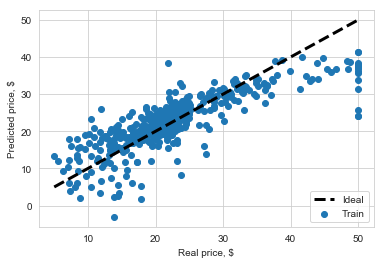

In [79]:
plt.scatter(Y_train, preds_train, label="Train")
plt.xlabel("Real price, $")
plt.ylabel("Predicted price, $")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=3, label="Ideal")
plt.legend(loc="lower right", frameon=True)
plt.show()

#### The model looks good(but can be better!) because the there isn't a big difference between the real price and predicted price for most data points
    For high prices (50) it seems that the predicted price is lower than the real price so that is one area we can improve our model

### Now let's try it on our test data 

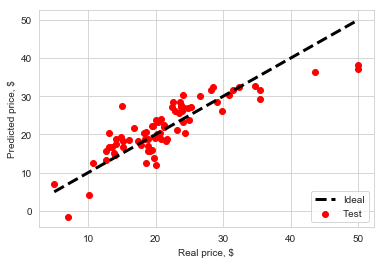

In [80]:
plt.scatter(Y_test, preds_test, c="r", label="Test")
plt.xlabel("Real price, $")
plt.ylabel("Predicted price, $")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=3, label="Ideal")
plt.legend(loc="lower right", frameon=True)
plt.show()

#### The model looks good(but can be better!) for our test data too which means that it is not overfitted on the training data

### Now lets viusalize it on our traing and test data

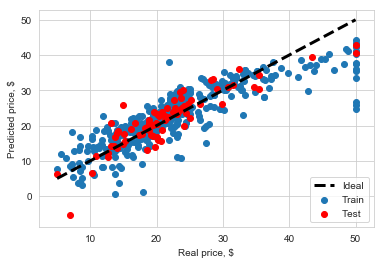

In [101]:
# It also interesting to take a look how the predicted points relate to real ones.
# All the points should lie on the black dotted line assuming that our model is perfect
plt.scatter(Y_train, preds_train, label="Train")
plt.scatter(Y_test, preds_test, c="r", label="Test")
plt.xlabel("Real price, $")
plt.ylabel("Predicted price, $")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=3, label="Ideal")
plt.legend(loc="lower right", frameon=True)
plt.show()

### But how do we evaluate it using concrete numbers?
    We will use the Mean Absolute Error(MAE), Mean Square Error(MSE) and R2 score on our test dataset

## ***Evaluation Metrics***

We will use the following evaluation metrics for regression:
        - MAE
        - MSE
        - R2

In [82]:
from sklearn.model_selection import cross_val_score 

In [83]:
LR_score_MAE = cross_val_score(LinearRegression_model, X_test, Y_test, cv=5, scoring='neg_mean_absolute_error').mean().round(3)
LR_score_MSE = cross_val_score(LinearRegression_model, X_test, Y_test, cv=5, scoring='neg_mean_squared_error').mean().round(3)
LR_score_R2 = cross_val_score(LinearRegression_model, X_test, Y_test, cv=5, scoring='r2').mean().round(3)

print('MAE (CV):',LR_score_MAE)
print('MSE (CV):',LR_score_MSE)
print('R2 (CV):',LR_score_R2)

MAE (CV): -3.321
MSE (CV): -18.87
R2 (CV): 0.704


In [86]:
LR_score_MAE = cross_val_score(LinearRegression_model, X_test, Y_test, cv=5, scoring='neg_mean_absolute_error').mean().round(3)
LR_score_MSE = cross_val_score(LinearRegression_model, X_test, Y_test, cv=5, scoring='neg_mean_squared_error').mean().round(3)
LR_score_R2 = cross_val_score(LinearRegression_model, X_test, Y_test, cv=5, scoring='r2').mean().round(3)

print('MAE MODEL1 (CV):',LR_score_MAE)
print('MSE MODEL1 (CV):',LR_score_MSE)
print('R2 MODEL1 (CV):',LR_score_R2)

MAE MODEL1 (CV): -3.321
MSE MODEL1 (CV): -18.87
R2 MODEL1 (CV): 0.704


In [102]:
LR_score_MAE = cross_val_score(LinearRegression_model, X_test, Y_test, cv=5, scoring='neg_mean_absolute_error').mean().round(3)
LR_score_MSE = cross_val_score(LinearRegression_model, X_test, Y_test, cv=5, scoring='neg_mean_squared_error').mean().round(3)
LR_score_R2 = cross_val_score(LinearRegression_model, X_test, Y_test, cv=5, scoring='r2').mean().round(3)

print('MAE MODEL2 (CV):',LR_score_MAE)
print('MSE MODEL2 (CV):',LR_score_MSE)
print('R2 MODEL2 (CV):',LR_score_R2)

MAE MODEL2 (CV): -2.736
MSE MODEL2 (CV): -14.396
R2 MODEL2 (CV): 0.721


#### Basically, the MAE is the average distance between our predicted price and the real price
    The bigger the distance is, the bigger our error is

## Relative Feature Importance (Please Fix!!!)

In [84]:
# Visualising feature importance as per the fine tuned RFR fitting result

# Get Feature Importance and sort
col = list(X_test.columns)
sorted(zip(LinearRegression_model.feature_importances_,col),reverse=True)

# import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create DataFrame
feature_imp = pd.DataFrame(sorted(zip(LinearRegression_model.feature_importances_,col)), columns=['Value','Features'])

# Plot
plt.figure(figsize=(5, 5))
sns.barplot(x="Value", y="Features", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Relative Feature Importance')
plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## Partial Dependnce

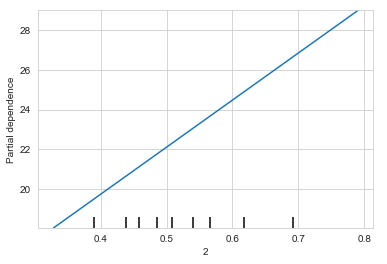

In [85]:
# In addition, we can check the Partial Dependence plot of a chosen variable
# check for NOX (the first feature of X gets index [0], and NOX is the second hence "features = [1]")
plot_partial_dependence(estimator = LinearRegression_model, X = X_train, features = [2] ,target='PRICE')

### If you think this model is good enough, you can save it

In [87]:
import pickle

In [1]:
filename = 'MyLinearRegressionModel.sav'
pickle.dump(LinearRegression_model, open(filename, 'wb'))

NameError: name 'pickle' is not defined

### And load it

In [104]:
loaded_model = pickle.load(open(filename, 'rb'))